# Random Forest Assignment

# Problem Statement:

1. Census-income data plays the most important role in the democratic system
of government, highly affecting the economic sectors. Census-related figures
are used to allocate federal funding by the government to different states and
localities.
2. Census data is also used for post census residents estimates and predictions,
economic and social science research, and many other such applications.
Therefore, the importance of this data and its accurate predictions is very
clear to us. The main aim is to increase awareness about how the income
factor actually has an impact not only on the individual lives of citizens but
also an effect on the nation and its betterment. You will have a look at the data
pulled out from the 1994 Census bureau database, and try to find insights into
how various features have an effect on the income of an individual.
3. The data contains approximately 32,000 observations with over 15 variables.
4. The strategy is to analyze the data and perform a predictive task of
classification to predict whether an individual makes over 50K a year or less
by using a logistic regression algorithm. .

# Data Description:

# 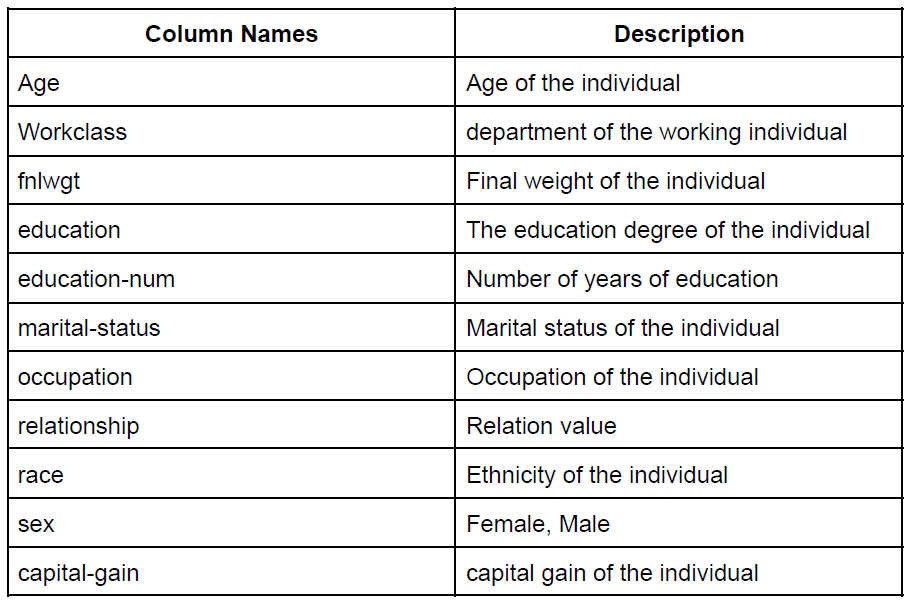

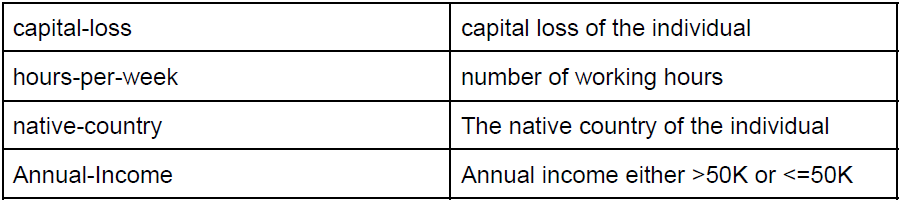

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import CSV_EDA
rcd = CSV_EDA.ReadCSVFile('census-income.csv')
c_data = rcd.getdata()
c_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
c_data.rename(columns={"Unnamed: 14":"annual_income"}, inplace=True)

In [4]:
c_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
c_data.duplicated().sum()

24

In [6]:
c_data.drop_duplicates(inplace=True)

In [7]:
c_data.duplicated().sum()

0

In [8]:
# Display unique values
c_data["workclass"].drop_duplicates()

0              State-gov
1       Self-emp-not-inc
2                Private
22           Federal-gov
25             Local-gov
27                     ?
54          Self-emp-inc
1901         Without-pay
5361        Never-worked
Name: workclass, dtype: object

In [9]:
c_data["annual_income"].drop_duplicates()

0    <=50K
7     >50K
Name: annual_income, dtype: object

In [10]:
c_data["occupation"].drop_duplicates()

0           Adm-clerical
1        Exec-managerial
2      Handlers-cleaners
4         Prof-specialty
6          Other-service
13                 Sales
14          Craft-repair
15      Transport-moving
16       Farming-fishing
17     Machine-op-inspct
24          Tech-support
27                     ?
30       Protective-serv
442         Armed-Forces
536      Priv-house-serv
Name: occupation, dtype: object

In [11]:
c_data["native-country"].drop_duplicates()

0                     United-States
4                              Cuba
6                           Jamaica
11                            India
14                                ?
15                           Mexico
27                            South
35                      Puerto-Rico
52                         Honduras
98                          England
112                          Canada
122                         Germany
135                            Iran
152                     Philippines
201                           Italy
217                          Poland
228                        Columbia
255                        Cambodia
265                        Thailand
289                         Ecuador
304                            Laos
311                          Taiwan
338                           Haiti
359                        Portugal
427              Dominican-Republic
497                     El-Salvador
503                          France
771                       Gu

In [12]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  annual_income   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
rcd.ReplaceDataWithNaN('?')

In [14]:
rcd.DataCleansing()

int64
object
int64
object
int64
object
object
object
object
object
int64
int64
int64
object
object


In [15]:
c_data =rcd.ApplyLabelEncoder(c_data)
c_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [16]:
c_data["annual_income"].drop_duplicates()

0    0
7    1
Name: annual_income, dtype: int32

In [17]:
# c_data.head()

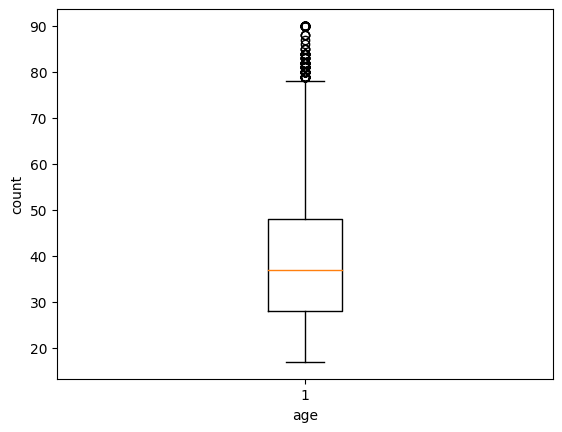

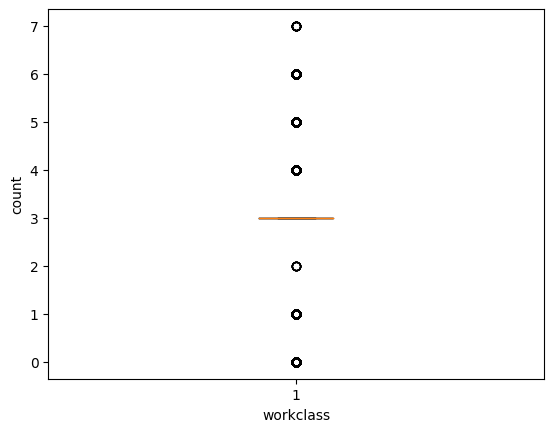

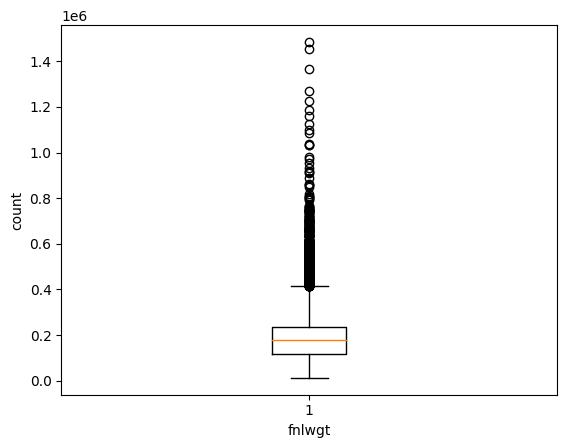

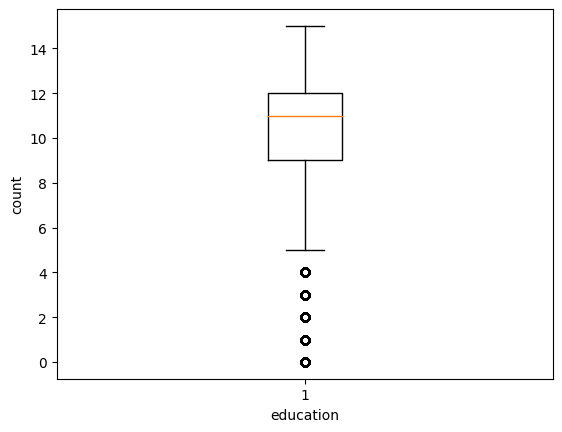

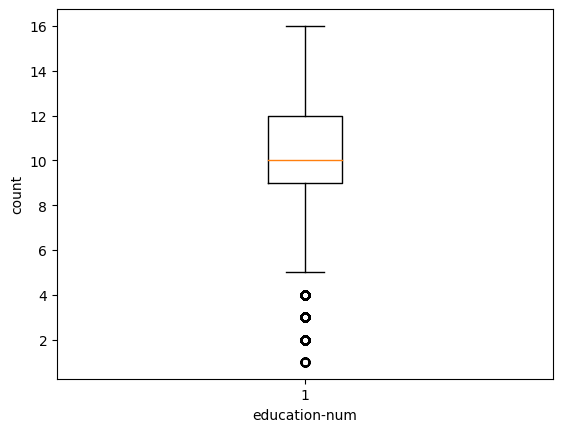

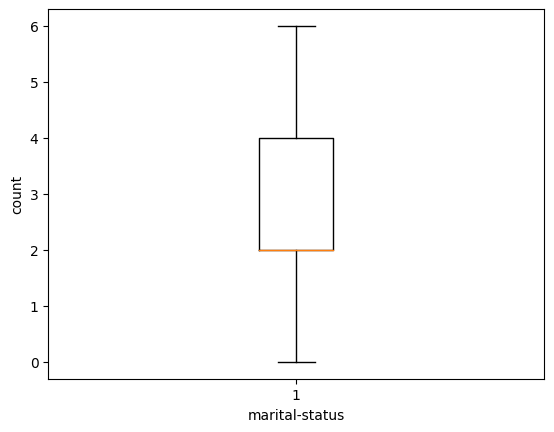

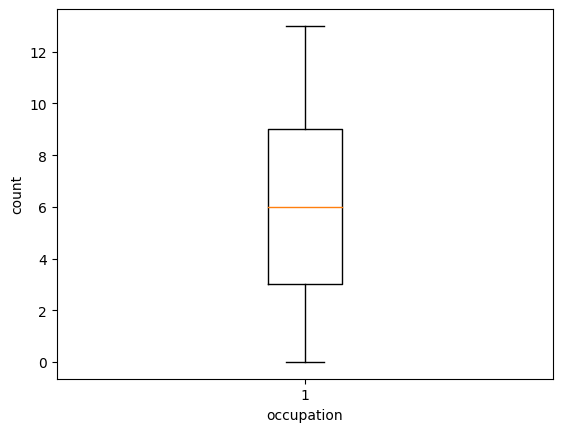

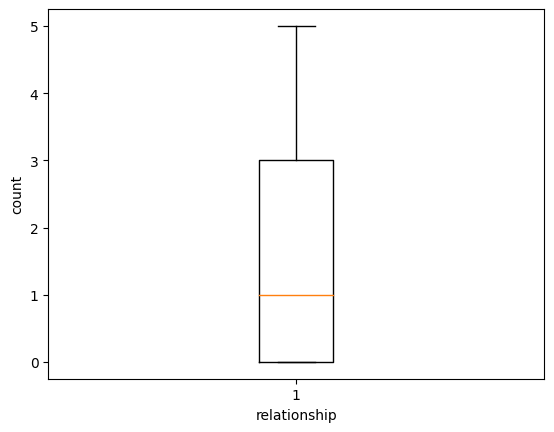

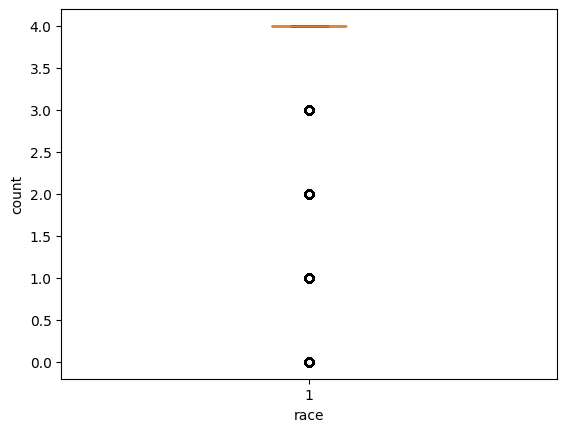

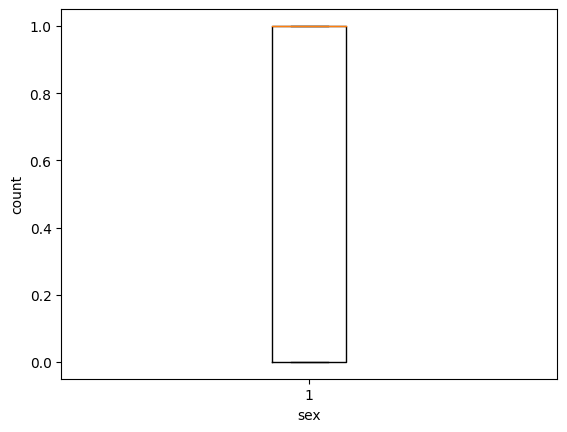

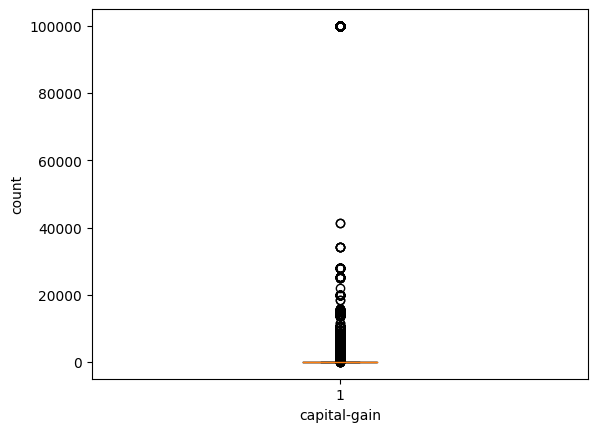

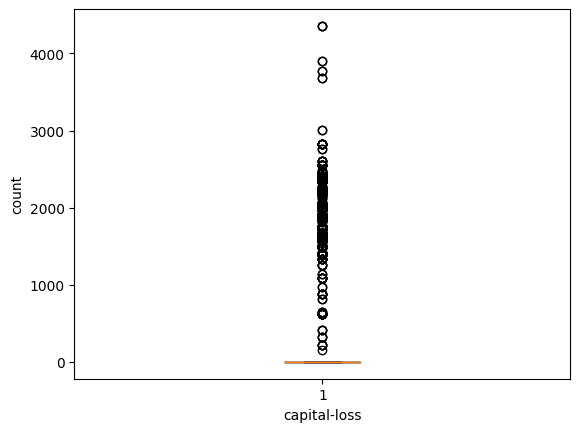

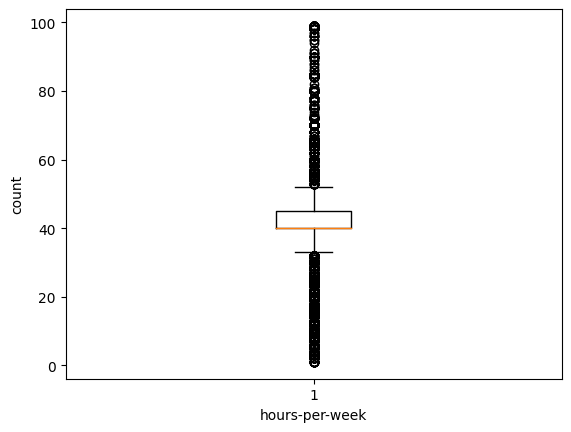

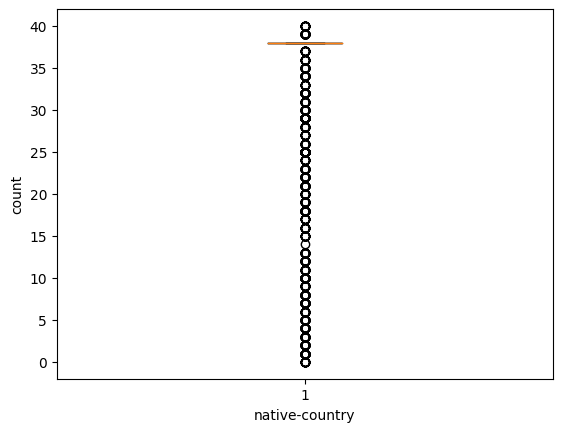

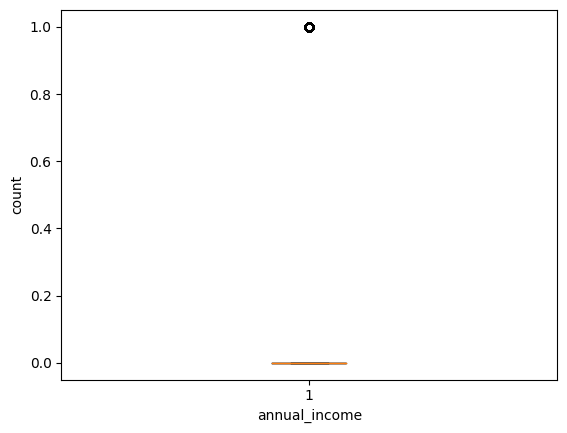

In [18]:
rcd.displayOutlierForAllcolumns()

In [19]:
rcd.remove_outlier(excludeColumns=["workclass","race","capital-gain","capital-loss","native-country","annual_income"])
# c_data.head()

age 37.0 -2.0 78.0
workclass 3.0 3.0 3.0
fnlwgt 178356.0 -60922.0 415742.0
education 11.0 4.5 16.5
education-num 10.0 4.5 16.5
marital-status 2.0 -1.0 7.0
occupation 6.0 -6.0 18.0
relationship 1.0 -4.5 7.5
race 4.0 4.0 4.0
sex 1.0 -1.5 2.5
capital-gain 0.0 0.0 0.0
capital-loss 0.0 0.0 0.0
hours-per-week 40.0 32.5 52.5
native-country 38.0 38.0 38.0
annual_income 0.0 0.0 0.0


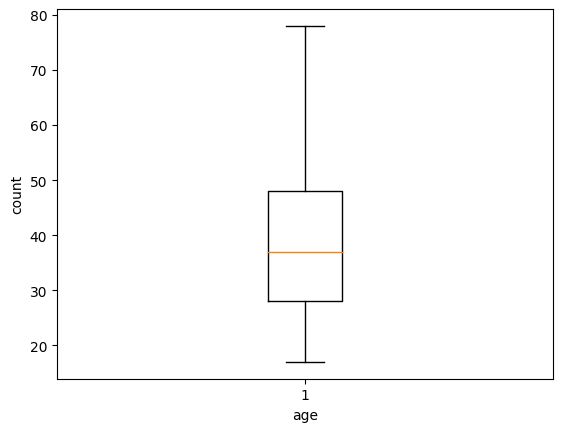

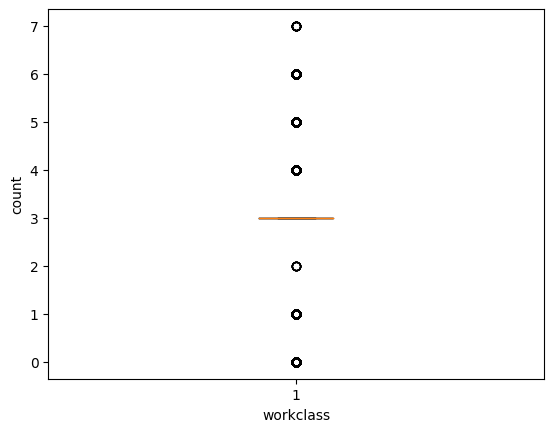

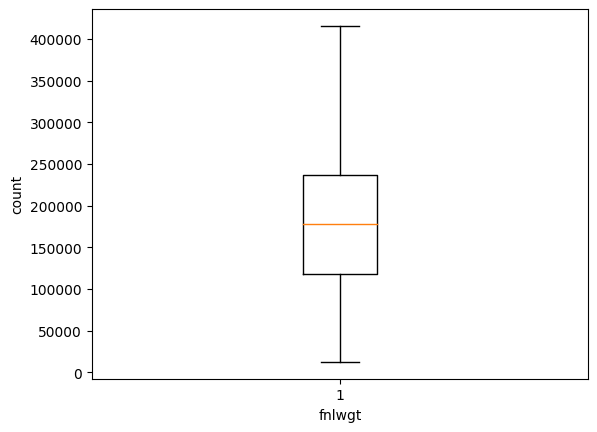

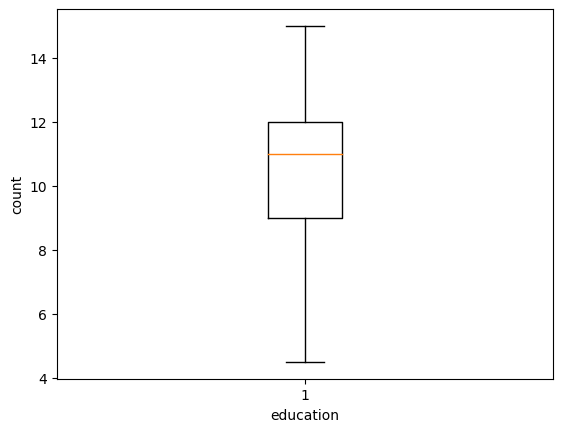

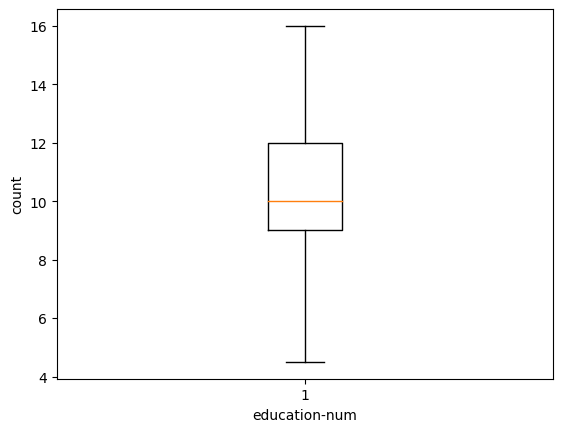

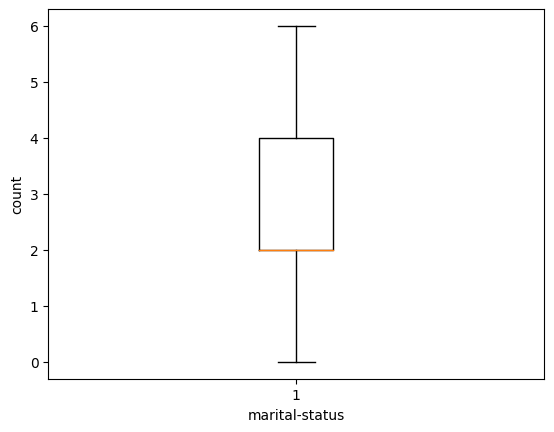

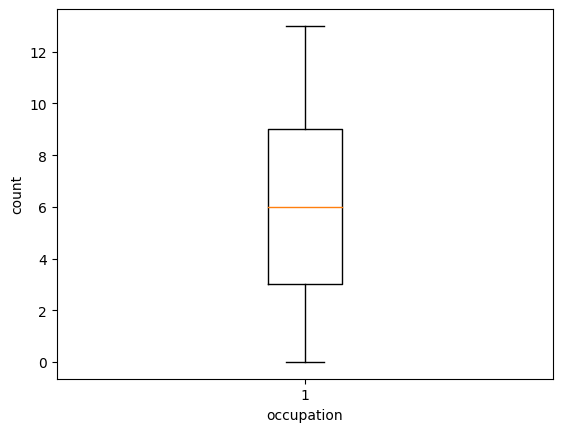

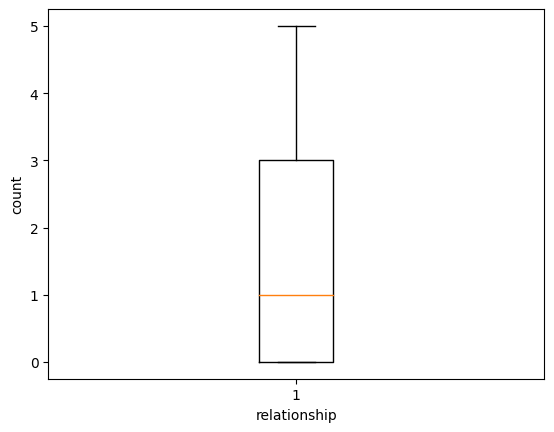

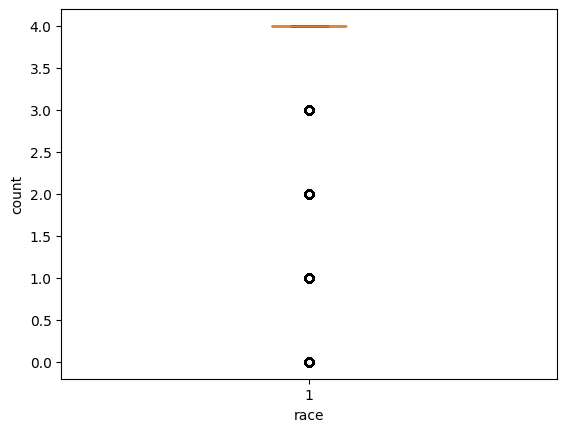

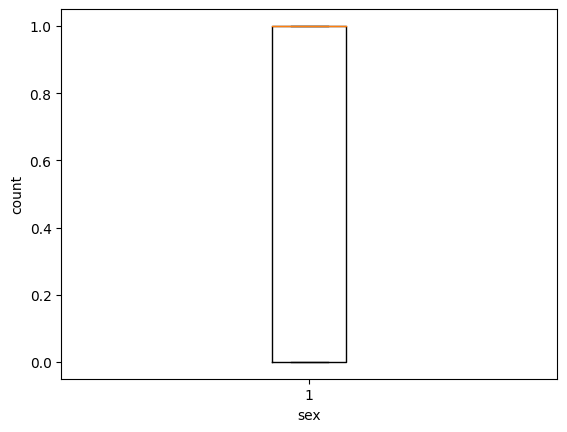

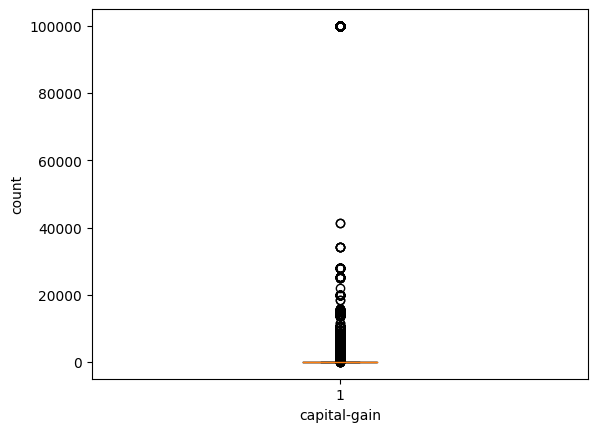

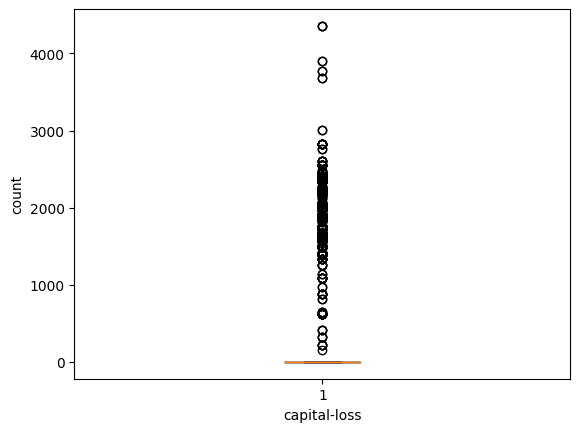

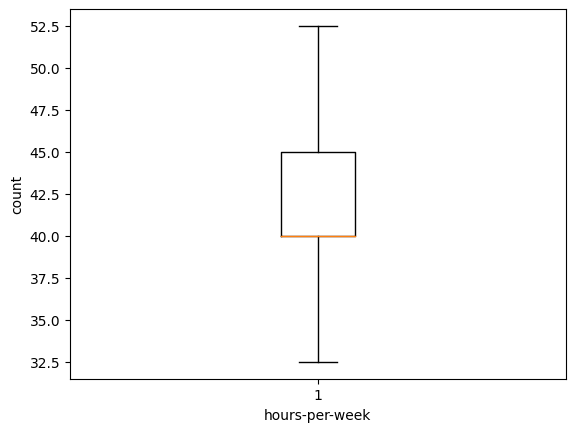

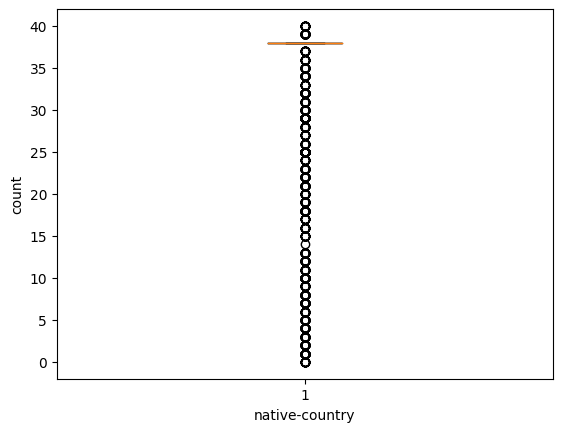

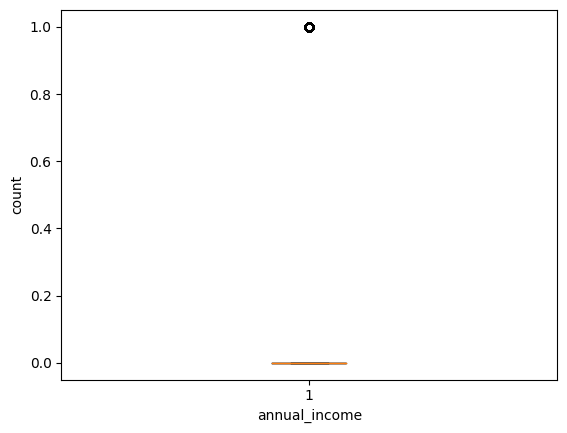

In [20]:
rcd.displayOutlierForAllcolumns()

<Axes: >

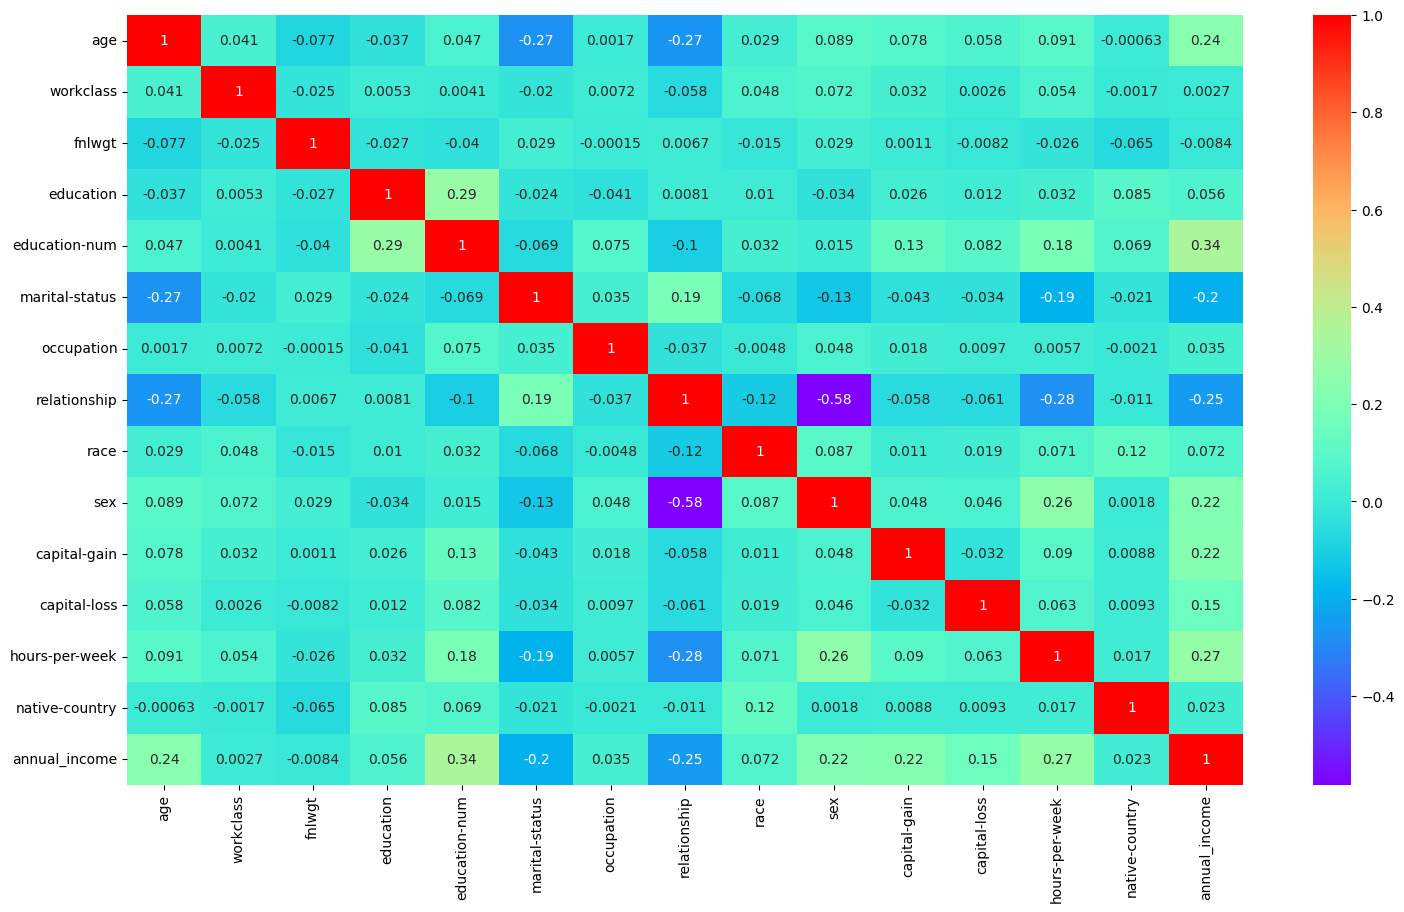

In [21]:
# c_data.corr()
fig=plt.figure(figsize=(18,10))
sns.heatmap(c_data.corr(),cmap="rainbow",annot=True)

In [22]:
x=c_data.drop(["annual_income"],axis=1)

In [23]:
y=c_data["annual_income"]

In [24]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6,77516.0,9.0,13.0,4.0,0.0,1.0,4,1.0,2174,0,40.0,38
1,50.0,5,83311.0,9.0,13.0,2.0,3.0,0.0,4,1.0,0,0,32.5,38
2,38.0,3,215646.0,11.0,9.0,0.0,5.0,1.0,4,1.0,0,0,40.0,38
3,53.0,3,234721.0,4.5,7.0,2.0,5.0,0.0,2,1.0,0,0,40.0,38
4,28.0,3,338409.0,9.0,13.0,2.0,9.0,5.0,2,0.0,0,0,40.0,4


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: annual_income, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size =0.3, random_state=0)

In [27]:
x_train.shape

(22775, 14)

In [28]:
x_test.shape

(9762, 14)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [30]:
y_pred = model.predict(x_test)

In [31]:
# y_pred([c_data.head(1)])
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [32]:
# c_data.iloc[0]
# x_test.tail(5)
# acc =accuracy_score(y_test,rf_model_pred)*100
rcd.accuracy_score(y_test,y_pred)
# acc

0.8586355255070682

In [33]:
cm = rcd.getConfusion_Matrix(y_pred,y_test)
cm


array([[6852,  887],
       [ 493, 1530]], dtype=int64)

<Axes: >

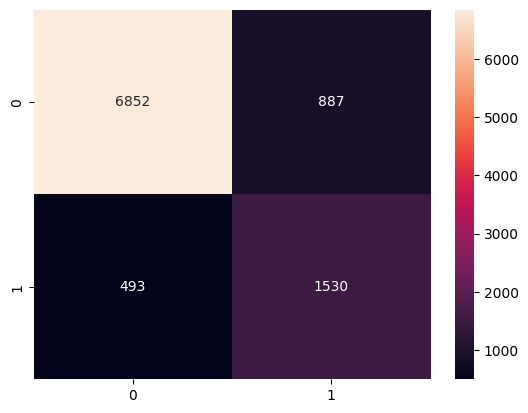

In [34]:
sns.heatmap(cm,annot=True,fmt="G")

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7739
           1       0.63      0.76      0.69      2023

    accuracy                           0.86      9762
   macro avg       0.78      0.82      0.80      9762
weighted avg       0.87      0.86      0.86      9762



In [56]:
# important_feature = pd.Series(model.feature_importances_,index = c_data.index )

In [58]:
from sklearn import svm
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),x, y, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

NameError: name 'cross_val_score' is not defined

In [36]:
from pprint import pprint
pprint(model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid) #, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [50]:
grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [45]:
# Fit the grid search to the data
# grid_search.fit(train_features, train_labels)

grid_search.best_params_
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 20}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
# Model Performance
# Average Error: 3.6561 degrees.
# Accuracy = 93.83%.
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
# grid_accuracy

In [32]:
li=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

In [33]:
for i in li:
    mo=RandomForestClassifier(n_estimators=i,random_state=56)
    mo.fit(x_train,y_train)
    model_pred=mo.predict(x_test)
#     acc =accuracy_score(y_test,model_pred)*100
    acc = rcd.accuracy_score(y_test,model_pred)
    print("no. of trees -",i,end=",")
    print("Accuracy",acc)  

no. of trees - 50,Accuracy 0.8584306494570785
no. of trees - 100,Accuracy 0.8579184593321041
no. of trees - 150,Accuracy 0.8594550297070273
no. of trees - 200,Accuracy 0.8592501536570375
no. of trees - 250,Accuracy 0.8587379635320631
no. of trees - 300,Accuracy 0.8589428395820529
no. of trees - 350,Accuracy 0.859659905757017
no. of trees - 400,Accuracy 0.859659905757017
no. of trees - 450,Accuracy 0.8599672198320016
no. of trees - 500,Accuracy 0.8593525916820324
no. of trees - 550,Accuracy 0.8593525916820324
no. of trees - 600,Accuracy 0.8597623437820119
no. of trees - 650,Accuracy 0.8593525916820324
no. of trees - 700,Accuracy 0.8595574677320221
no. of trees - 750,Accuracy 0.8593525916820324
no. of trees - 800,Accuracy 0.8594550297070273
no. of trees - 850,Accuracy 0.8594550297070273
no. of trees - 900,Accuracy 0.8599672198320016
no. of trees - 950,Accuracy 0.860479409956976
no. of trees - 1000,Accuracy 0.8603769719319811


# 1. What is the biggest advantage that helps random forest classifiers to triumph over the decision trees?
    A. It has shown great predictive results over decision tree models.
    B. It Combines all positive predictions from all decision trees
    C. It works on the bagging method(bootstrap method)
    D. All of the above


# Answer D

# 2. In a given problem where you have a very large dataset with both continuous and categorical features, why would you choose the random forest classifier?
    A. Random forest can work on both regression and classification problem
    B. High accuracy with less need for interpretation
    C. Works well with the high dimensional data
    D. All of the above


# Answer D

# 3. Which of the following techniques is used in the Random Forest model?
    A. Bagging
    B. Boosting
    C. Ensemble
    D. None of the these


# Answer B

# 4. Choose the total population with income greater than 50% income?
    A. 75%
    B. 25%
    C. 24.08%
    D. 35%


In [16]:
# c_data.head()

In [9]:
people_sal_grater_than_50K = c_data[c_data["annual_income"]==">50K"].count()
people_sal_grater_than_50K["age"]

7839

In [10]:
total_population = c_data.count()
total_population["age"]

32537

In [11]:
percentage_of_people_greater_than_50K = (people_sal_grater_than_50K*100)/total_population
percentage_of_people_greater_than_50K["age"]

24.092571533945968

# Answer C

# 5. Compute how many samples of the population are unmarried and working hours less than 20 hours?
    A. 134
    B. 145
    C. 127
    D. 123

In [12]:
unmarried_people = (c_data["marital-status"]=="Never-married") & (c_data["hours-per-week"]<20)
# people_with_less_th_20_hrs_working = unmarried_people[unmarried_people["hours-per-week"]<20]
# people_with_less_th_20_hrs_working.count()
c_data[unmarried_people].nunique()

age                53
workclass           9
fnlwgt            863
education          16
education-num      16
marital-status      1
occupation         15
relationship        4
race                5
sex                 2
capital-gain       10
capital-loss        8
hours-per-week     19
native-country     28
annual_income       2
dtype: int64

In [49]:
temp = c_data.groupby(["hours-per-week","marital-status"])["hours-per-week"].count()
temp = temp.to_frame(name="tot_count").reset_index()
temp = temp[(temp["marital-status"]="Never-married") & (temp["tot_count"]<=20 )]
temp["marital-status"].count()

258

In [52]:
temp = c_data.groupby(["marital-status","hours-per-week"])["hours-per-week"].count()

temp = temp.to_frame(name="tot_count").reset_index()
temp
temp = temp[(temp["marital-status"]=="Never-married") & (temp["tot_count"]<=20 )]
temp["marital-status"].count()

47

# 6. Choose the correct list of age with minimum age , maximum and 50th Percentile of the age group?
    A. [17,90,36]
    B. [15,95,37]
    C. [17,90,37]
    D. All


int64
object
int64
object
int64
object
object
object
object
object
int64
int64
int64
object
object


In [78]:
rcd.ReplaceDataWithNaN()

In [14]:

print("minimum age:",c_data["age"].min(),"maximum age:",c_data["age"].max(),"50th Percentile of the age group:",c_data["age"].quantile(0.50))
list1 = list()
list1.append(c_data["age"].min())
list1.append(c_data["age"].max())
list1.append(c_data["age"].quantile(0.50))
list1

minimum age: 17 maximum age: 90 50th Percentile of the age group: 37.0


[17, 90, 37.0]

# Answer C

# 7. From above census data which country has the highest population and the lowest population?
    A. United-States and scotland
    B. United-States and Holland-Netherlands
    C. Scotland and Holland-Netherlands
    D. Mexico and Holland-Netherlands


In [99]:
temp = c_data.groupby(["native-country"])["native-country"].count()
temp = temp.to_frame(name="total_population").reset_index()
highest_population_country = temp[temp["total_population"] == temp["total_population"].max()]
lowest_population_country = temp[temp["total_population"] == temp["total_population"].min()]

highest_population_country = temp[(temp["total_population"] == temp["total_population"].max()) | (temp["total_population"] == temp["total_population"].min()) ]
highest_population_country


,native-country,total_population
14,Holand-Netherlands,1
38,United-States,29735


# Answer B

In [96]:
# c_data.head()

# 8. How does n_estimators work in the random forest classifier?
    A. Number of random forests for the classifier.
    B. Number of iterations
    C. Training epochs
    D. Number of decision trees


# Answer D

# 9. Can the target data for the random forest model be categorical or continuous value?
    A. Yes
    B. No


# Answer A

# 10. How can you use hyperparameter tuning to your advantage while working with the random forest classifier?
    A. Improve the model’s performance
    B. Normalizes the features
    C. Standardization of the data
    D. All of the above


In [107]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# 11. Select the best hyperparameters by RandomSearchCV and fit the model with the best hyperparameters and compute the accuracy score of the model.
    A. 90% and above
    B. 50% to 70%
    C. 30% to 50&
    D. None of the above


# 12. Which of the following Two features are most important in Random forest model?
    A. Predict_proba
    B. Correlation between 2 trees and how strong an individual tree is
    C. sensitivity and specificity
    D. None of the above


# Answer B

# 13. Based on what values, the feature importance will be calculated?
    A. mean increase gini and mean decrease accuracy
    B. Mean decrease gini and mean decrease accuracy
    C. mean increase gini and mean increase accuracy
    D. All of the above


# 14.From the above model, state the disadvantage of the random forest?
    A. It is a time consuming model building process
    B. It is same as all other model
    C. It’s training time is huge due to the complexity of the model
    D. None of the above


# 15. Which are the two methods used for hyperparameter tuning and cross-validation?
    A. RandomForestCLassifier
    B. RandomizedSearchCV
    C. GridSearchCV
    D. RandomizedSearchCV and GridSearchCV